## Load spont

* Load from neurodata without border (NWB).

setup spikeinterf0_100_5

In [42]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import spikeinterface as si

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config

# SETUP CONFIG
data_conf, param_conf = get_config("silico_neuropixels", "concatenated").values()
NWB_PATH = data_conf["nwb"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-11-06 15:41:18,260 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-06 15:41:18,295 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load wired recording from NWB

In [43]:
# NWB way
RecNWB = si.load_extractor(data_conf["probe_wiring"]["full"]["output"])

# old way
RecOld = si.load_extractor(
    "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/dataeng/recording/traces_noise_fitd_gain_fitd_adj10perc_less_int16"
)

In [39]:
# unit-test
tracenwb = RecNWB.get_traces()
traceold = RecOld.get_traces()
(tracenwb == traceold).all()

False

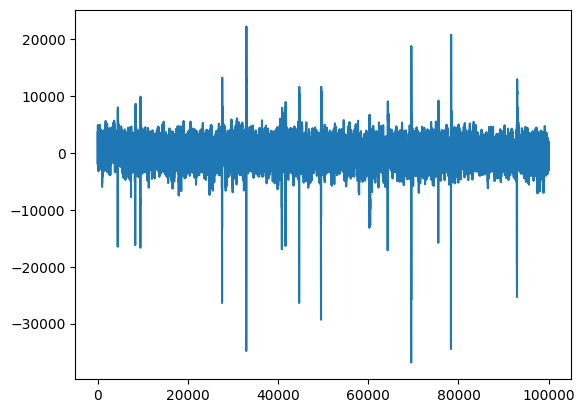

In [44]:
from matplotlib import pyplot as plt

plt.plot(tracenwb[:100000, 143])

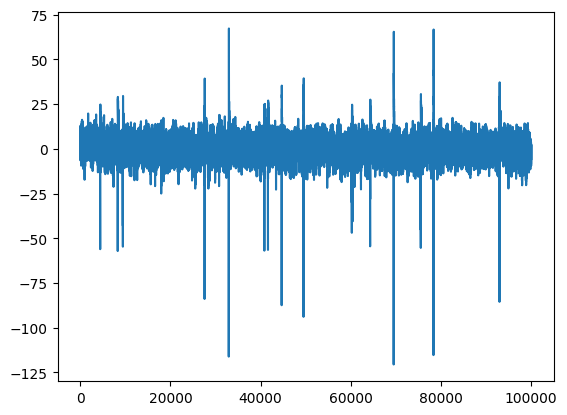

In [41]:
plt.plot(traceold[:100000, 143])

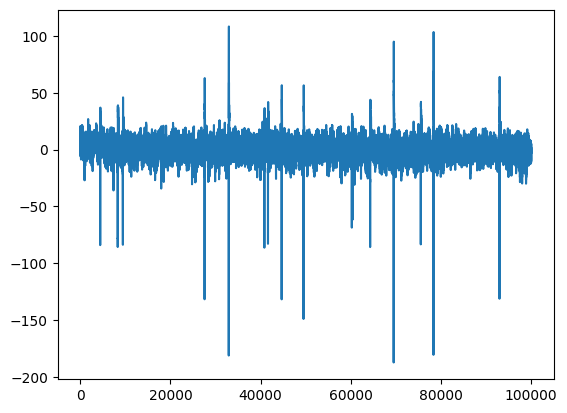

In [46]:
Rec = si.load_extractor(
    "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/dataeng/recording/traces"
)
trace = Rec.get_traces()
plt.plot(trace[:100000, 143])